# Case Study : Loan Approval Prediction

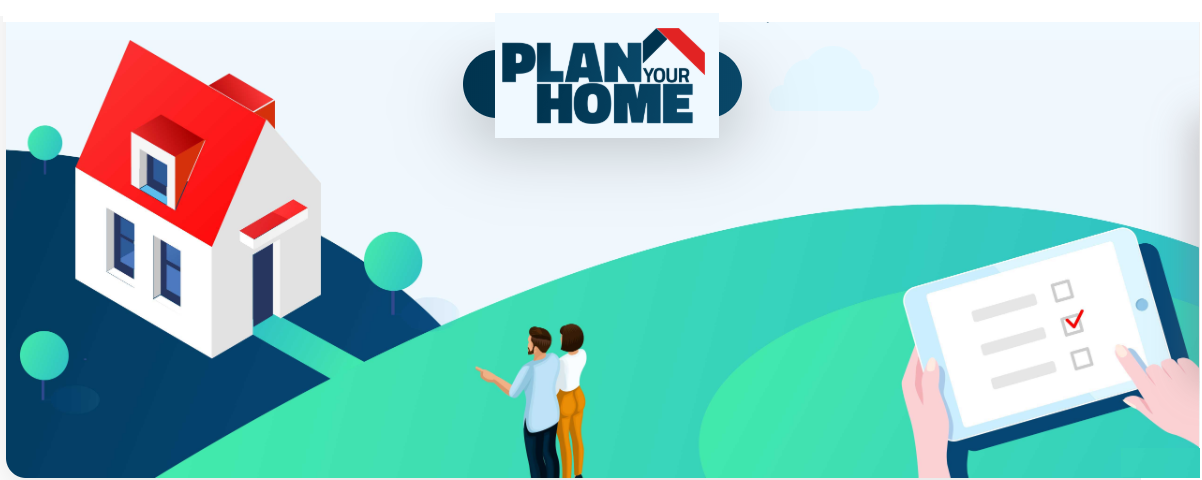

This case study will help us to understand the stages in the data science project lifecycle with loans data set to predict whether the loan will be approved or not. We will focus on the following four stages namely -

- Business Understanding
- Data Acquisition
- Data Preparation
- Exploratory Data Analysis
- Feature Engineering
- Model Building and Selection

# 1. Business Understanding

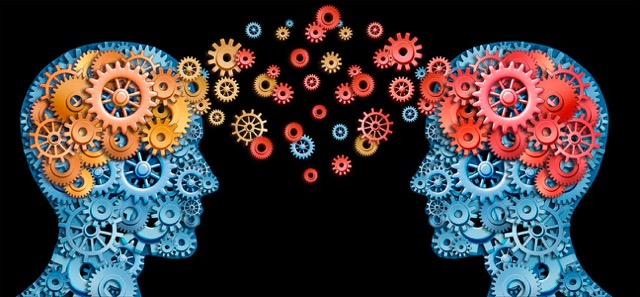

"HomePlanners" offers home loans with very less EMIs and interest rates starting from 8.25%* p.a.. They are helping the people to create a space of their own with Home Loans. The home Loans are tailor made for salaried individuals as well as the other individuals as they offer an attractive rate of interest and a longer tenure. They also provide the home buyers with legal and technical counselling to help them make the right home buying decision. Its an opportunity for the home buyers to bring their dream home into reality with "HomePlanners" Home Loans With benefits such as a low-interest rate, longer tenure, comfortable home loan EMI and doorstep service etc. 

They are having dedicated workforces deployed into the field catering to the different regions like urban , semi-urban and rural areas. The home loan products sales team reaches the customers through different channels. Once the initial consultation is done, then customer are asked to submit an application for the home loan in which many intersting characteristics of customers are captured. Then based on this information provided, the loan approval team decides whether to consider the application for the disbursement or not. The various attributes that plays important role in this approval process are gender, income, number of applicants, marital status, loan demand and term , past history of customer with bank etc. 

This process of decision making is time consuming as lot of time is required for the screening of the information. The bank is looking at the opportunity to automate the process of approval. They want to identify the different customer segements, which are eligible for loan amount so they can just target those customers only. 

It seems to be a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, discrete values are predicted based on a given set of independent variable(s). <br>

Classification can be of two types:

- Binary Classification : Predicts either of the two given classes. For example: identifying loan will be approved or not, 
student will take admission or not, customer will buy or not<br>
- Multiclass Classification : Classify the data into more than two discrete classes. For example: identifying what customer is going to buy whether book, electronic item or appearals, classifying the customers into high , middle or low income ranges etc.

Then need to think about the different factors that can affect the loan approval. Few of the immediate one can be listed as follows - <br>
- income of applicant
- is applicant self employed or salaried
- age of applicant
- job type of applicant 
- marital status 
- credit history for previous loans
- loan amount 
- tenure of the loan etc.<br><br>
Lets see what all factors will play significant role in the loan approval.

# 2. Data Acquisition 
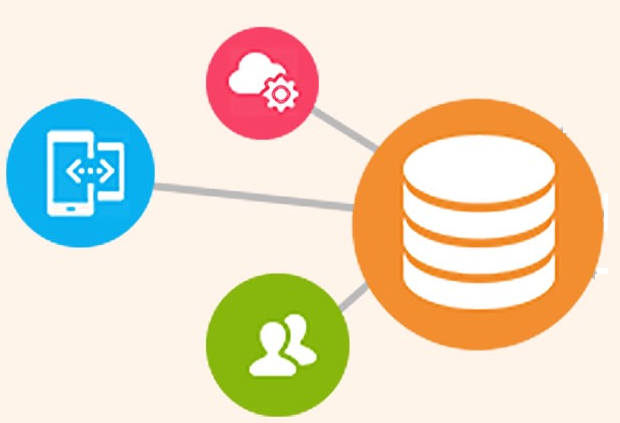

As the customer categories are different like Urban, Semi-urban and rural, the dataset is provided into three different CSV files. We need to acquire these datasets and prepare a dataframe which can be used for further for data exploration and model building. 

### 2.1 Package Imports

In [1]:
#Need to import the required packages
import pandas as pd 
import numpy as np                    
import seaborn as sns                 
import matplotlib.pyplot as plt       
%matplotlib inline 
import warnings                       

### 2.2 Reading data from Loans Datasets

In [2]:
urban_data=pd.read_csv("Urban_loans.csv") 
urban_data.head(2)

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Approved
0,L1,M,Yes,NaN,Grad,2600.0,0,115.0,NaN,3500.0,Yes,Y
1,L2,M,Yes,0.0,Grad,5649.0,1,44.0,360.0,0.0,Yes,Y


In [3]:
semiurban_data=pd.read_csv("Semi_Urban_loans.csv") 
semiurban_data.head(2)

,LID,Gender,Applicant_Income,Dependents,Education,Marrital_Status,Self_Employed,LoanAmt,LoanAmountTerm,Coapplicant_Income,Credit_History,Approved
0,Semi76,M,9560.0,0,G,1.0,Yes,191.0,360.0,0.0,1.0,1.0
1,Semi77,M,1875.0,2,NG,1.0,Yes,97.0,360.0,1875.0,1.0,1.0


In [4]:
rural_data=pd.read_csv("Rural_loans.csv") 
rural_data.head(2)

,Loan_ID,Sex,Marrital_Status,DependentsCount,Self_Employed,Education,Loan_Term,LoanAmount,Income,Loan_Status
0,R36,NaN,Yes,2,0.0,NG,360.0,112.0,3365.0,No
1,R37,1.0,Yes,1,0.0,NG,180.0,113.0,2653.0,No


### 2.3 Confirm the imports

Lets now check whether all the records are imported into the data frames by checking the numner of rows and columns.

In [5]:
urban_data.shape

(37, 12)

In [6]:
semiurban_data.shape

(41, 12)

In [7]:
rural_data.shape

(42, 10)

### 2.4 Quick Look at columns 

As the data is coming from three different sources, lets quickly look at the structure of the data frames and the actual data values present in the columns in order to idenfity the similarities and dissimilaries between them. Pandas should be able to help us in doing this.

In [8]:
urban_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved'],
      dtype='object')

In [9]:
semiurban_data.columns

Index(['LID', 'Gender', 'Applicant_Income', 'Dependents', 'Education',
       'Marrital_Status', 'Self_Employed', 'LoanAmt', 'LoanAmountTerm',
       'Coapplicant_Income', 'Credit_History', 'Approved'],
      dtype='object')

In [10]:
rural_data.columns

Index(['Loan_ID', 'Sex', 'Marrital_Status', 'DependentsCount', 'Self_Employed',
       'Education', 'Loan_Term', 'LoanAmount', 'Income', 'Loan_Status'],
      dtype='object')

Though the columns looks similar but still the naming of these columns is different. We need to do a careful analysis of each and every columns of these three dataframes. After looking at the columns, its now time go ahead and have look at the unique values of similar columns.

# 3. Data Preparation
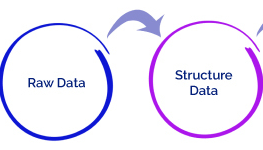

As we have seen the data is coming from three different data sources, a lot data preprocessing needs to be done to standardize the columns and the data values present in it. Lets try them out one by one.

In [11]:
columns = set(urban_data.columns.append(semiurban_data.columns).append(rural_data.columns))
columns

{'Applicant_Income',
 'Approved',
 'CoapplicantIncome',
 'Coapplicant_Income',
 'Credit_History',
 'Dependents',
 'DependentsCount',
 'Education',
 'Gender',
 'Income',
 'LID',
 'LoanAmount',
 'LoanAmountTerm',
 'LoanAmt',
 'Loan_Amt',
 'Loan_ID',
 'Loan_Status',
 'Loan_Term',
 'Married',
 'Marrital_Status',
 'Self_Employed',
 'Sex',
 'Tenure'}

Oh! there seems to be lot of attributes present in these datasets which are having same meanings but are named differently.

- Loan_ID, LID seems to be same
- CoapplicantIncome, Coapplicant_Income seems to be same
- Dependents, DependentsCount are same
- LoanAmount, LoanAmt, Loan_Amt are same
- LoanAmountTerm, Loan_Term and Tenure are same
- Married, Marrital_Status are same
- Gender, Sex are same
- Income, Applicant_Income are same
- Approved, Loan_Status are same and seems to be target variable

We can think of the following columns for the merged datasets. 

- Loan_ID
- Gender
- Married
- Tenure
- Education
- Self_Employed
- Income
- CoapplicantIncome
- Credit_History
- Dependents
- Loan_Amt
- Approved ( Target)

### 3.1 Checking for unique data values

Lets try to bring all the data values of the different columns into the same format. A lot of preprocessing needs to be done in order to bring this commanality into the data values.

In [12]:
#For urban_data
print(urban_data['Gender'].unique())
print(urban_data['Married'].unique())
print(urban_data['Self_Employed'].unique())
print(urban_data['Education'].unique())
print(urban_data['Credit_History'].unique())
print(urban_data['Approved'].unique())

['M' nan 'F']
['Yes' 'No' nan]
[nan  0.  1.]
['Grad' 'NonGrad' nan]
['Yes' 'No' nan]
['Y' 'N' nan]


In [13]:
#For Semi_urban_data
print(semiurban_data['Gender'].unique())
print(semiurban_data['Marrital_Status'].unique())
print(semiurban_data['Self_Employed'].unique())
print(semiurban_data['Education'].unique())
print(semiurban_data['Credit_History'].unique())
print(semiurban_data['Approved'].unique())

['M' 'F' nan]
[ 1. -1. nan]
['Yes' 'No' nan]
['G' 'NG' nan]
[ 1. nan  0.]
[ 1.  0. nan]


In [14]:
#For rural_data
print(rural_data['Sex'].unique())
print(rural_data['Marrital_Status'].unique())
print(rural_data['Self_Employed'].unique())
print(rural_data['Education'].unique())
print(rural_data['Loan_Status'].unique())

[nan  1.  0.]
['Yes' 'No' nan]
[ 0.  1. nan]
['NG' 'G' nan]
['No' 'Yes' nan]


These are the common columns into the three data frames but the actual data values are encoded differently. We need to arrive at a common format for the data values for the columns like 'Gender', 'Married', 'Education' and 'Approved'. Lets try to standardize the data frames from the imported datasets.

### 3.2 Standardize Urban loan data

In [15]:
#Prepare urban_df from the urban_data dataframe and manipulate it further
urban_df = pd.DataFrame()
urban_df['Loan_ID'] = urban_data['Loan_ID']
urban_df['Gender'] = urban_data['Gender']
urban_df['Married'] = urban_data['Married']
urban_df['Self_Employed'] = urban_data['Self_Employed']
urban_df['Education'] = urban_data['Education']
urban_df['Applicant_Income'] = urban_data['Applicant_Income']
urban_df['Dependents'] = urban_data['Dependents']
urban_df['Loan_Amt'] = urban_data['Loan_Amt']
urban_df['Tenure'] = urban_data['Tenure']
urban_df['CoapplicantIncome'] = urban_data['CoapplicantIncome']
urban_df['Credit_History'] = urban_data['Credit_History']
urban_df['Property_Location'] = "URBAN"    # Need to maintain the area for which loan is demanded
urban_df['Approved'] = urban_data['Approved']
urban_df.head(2)

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Property_Location,Approved
0,L1,M,Yes,NaN,Grad,2600.0,0,115.0,NaN,3500.0,Yes,URBAN,Y
1,L2,M,Yes,0.0,Grad,5649.0,1,44.0,360.0,0.0,Yes,URBAN,Y


In [16]:
#For urban_data
print(urban_data['Gender'].unique())
print(urban_data['Married'].unique())
print(urban_data['Self_Employed'].unique())
print(urban_data['Education'].unique())
print(urban_data['Credit_History'].unique())
print(urban_data['Approved'].unique())

['M' nan 'F']
['Yes' 'No' nan]
[nan  0.  1.]
['Grad' 'NonGrad' nan]
['Yes' 'No' nan]
['Y' 'N' nan]


### 3.3 Standardize SemiUrban loan data

In [17]:
#For semiurban_data , lets explore unique data
print(semiurban_data['Gender'].unique())
print(semiurban_data['Marrital_Status'].unique())
print(semiurban_data['Self_Employed'].unique())
print(semiurban_data['Education'].unique())
print(semiurban_data['Credit_History'].unique())
print(semiurban_data['Approved'].unique())

['M' 'F' nan]
[ 1. -1. nan]
['Yes' 'No' nan]
['G' 'NG' nan]
[ 1. nan  0.]
[ 1.  0. nan]


In [18]:
#Standardize the 'Marrital_Status'
semiurban_data['Marrital_Status'].replace(1, 'Yes', inplace= True)
semiurban_data['Marrital_Status'].replace(-1, 'No', inplace= True)
semiurban_data['Marrital_Status'][0:5]

0    Yes
1    Yes
2    Yes
3     No
4     No
Name: Marrital_Status, dtype: object

In [19]:
#Standardize the 'Self_Employed'
semiurban_data['Self_Employed'].replace('Yes', 1, inplace= True)
semiurban_data['Self_Employed'].replace('No', 0, inplace= True)
semiurban_data['Self_Employed'][0:5]

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Self_Employed, dtype: float64

In [20]:
#Standardize the 'Education'
semiurban_data['Education'].replace('G', 'Grad', inplace= True)
semiurban_data['Education'].replace('NG', 'NonGrad', inplace= True)
semiurban_data['Education'][0:5]

0       Grad
1    NonGrad
2       Grad
3    NonGrad
4       Grad
Name: Education, dtype: object

In [21]:
#Standardize the 'Credit_History'
semiurban_data['Credit_History'].replace(1, 'Yes', inplace= True)
semiurban_data['Credit_History'].replace(0, 'No', inplace= True)
semiurban_data['Credit_History'][0:5]

0    Yes
1    Yes
2    NaN
3    Yes
4     No
Name: Credit_History, dtype: object

In [22]:
#Standardize the 'Approved'
semiurban_data['Approved'].replace(1, 'Y', inplace= True)
semiurban_data['Approved'].replace(0, 'N', inplace= True)
semiurban_data['Approved'][0:5]

0    Y
1    Y
2    N
3    Y
4    N
Name: Approved, dtype: object

In [23]:
#Prepare semiurban_df from the semiurban_data dataframe and manipulate it further
semiurban_df = pd.DataFrame()
semiurban_df['Loan_ID'] = semiurban_data['LID']
semiurban_df['Gender'] = semiurban_data['Gender']
semiurban_df['Married'] = semiurban_data['Marrital_Status']
semiurban_df['Self_Employed'] = semiurban_data['Self_Employed']
semiurban_df['Education'] = semiurban_data['Education']
semiurban_df['Applicant_Income'] = semiurban_data['Applicant_Income']
semiurban_df['Dependents'] = semiurban_data['Dependents']
semiurban_df['Loan_Amt'] = semiurban_data['LoanAmt']
semiurban_df['Tenure'] = semiurban_data['LoanAmountTerm']
semiurban_df['CoapplicantIncome'] = semiurban_data['Coapplicant_Income']
semiurban_df['Credit_History'] = semiurban_data['Credit_History']
semiurban_df['Property_Location'] = "SEMI_URBAN" # Need to maintain the area for which loan is demanded
semiurban_df['Approved'] = semiurban_data['Approved']
semiurban_df.head(2)

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Property_Location,Approved
0,Semi76,M,Yes,1.0,Grad,9560.0,0,191.0,360.0,0.0,Yes,SEMI_URBAN,Y
1,Semi77,M,Yes,1.0,NonGrad,1875.0,2,97.0,360.0,1875.0,Yes,SEMI_URBAN,Y


In [24]:
#For semiurban_data , lets explore unique data
print(semiurban_data['Gender'].unique())
print(semiurban_data['Marrital_Status'].unique())
print(semiurban_data['Self_Employed'].unique())
print(semiurban_data['Education'].unique())
print(semiurban_data['Credit_History'].unique())
print(semiurban_data['Approved'].unique())

['M' 'F' nan]
['Yes' 'No' nan]
[ 1.  0. nan]
['Grad' 'NonGrad' nan]
['Yes' nan 'No']
['Y' 'N' nan]


### 3.4 Standardize Rural loan data

In [25]:
#For rural_data, lets explore the rural data frame
print(rural_data['Sex'].unique())
print(rural_data['Marrital_Status'].unique())
print(rural_data['Self_Employed'].unique())
print(rural_data['Education'].unique())
print(rural_data['Loan_Status'].unique())

[nan  1.  0.]
['Yes' 'No' nan]
[ 0.  1. nan]
['NG' 'G' nan]
['No' 'Yes' nan]


In [26]:
#Standardize the 'Sex'
rural_data['Sex'].replace(1, 'M', inplace= True)
rural_data['Sex'].replace(0, 'F', inplace= True)
rural_data['Sex'][0:5]

0    NaN
1      M
2      M
3      M
4      M
Name: Sex, dtype: object

In [27]:
#Standardize the 'Education'
rural_data['Education'].replace('NG', 'NonGrad', inplace= True)
rural_data['Education'].replace('G', 'Grad', inplace= True)
rural_data['Education'][0:5]

0    NonGrad
1    NonGrad
2       Grad
3       Grad
4       Grad
Name: Education, dtype: object

In [28]:
#Standardize the 'Loan_Status'
rural_data['Loan_Status'].replace('No', 'Y', inplace= True)
rural_data['Loan_Status'].replace('Yes', 'N', inplace= True)
rural_data['Loan_Status'][0:5]

0    Y
1    Y
2    N
3    Y
4    N
Name: Loan_Status, dtype: object

In [29]:
#Prepare rural_df from the rural_data dataframe and manipulate it further
rural_df = pd.DataFrame()
rural_df['Loan_ID'] = rural_data['Loan_ID']
rural_df['Gender'] = rural_data['Sex']
rural_df['Married'] = rural_data['Marrital_Status']
rural_df['Self_Employed'] = rural_data['Self_Employed']
rural_df['Education'] = rural_data['Education']
rural_df['Applicant_Income'] = rural_data['Income']
rural_df['Dependents'] = rural_data['DependentsCount']
rural_df['Loan_Amt'] = rural_data['LoanAmount']
rural_df['Tenure'] = rural_data['Loan_Term']
rural_df['CoapplicantIncome'] = 0
rural_df['Credit_History'] = "No"
rural_df['Property_Location'] = "RURAL" # Need to maintain the area for which loan is demanded
rural_df['Approved'] = rural_data['Loan_Status']
rural_df.head(2)

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Property_Location,Approved
0,R36,NaN,Yes,0.0,NonGrad,3365.0,2,112.0,360.0,0,No,RURAL,Y
1,R37,M,Yes,0.0,NonGrad,2653.0,1,113.0,180.0,0,No,RURAL,Y


In [30]:
#For rural_data
print(rural_data['Sex'].unique())
print(rural_data['Marrital_Status'].unique())
print(rural_data['Self_Employed'].unique())
print(rural_data['Education'].unique())
print(rural_data['Loan_Status'].unique())

[nan 'M' 'F']
['Yes' 'No' nan]
[ 0.  1. nan]
['NonGrad' 'Grad' nan]
['Y' 'N' nan]


### 3.5 Merge the loan dataframes

As we need to prepare a generalized data model for all the loan cases, its necessary for us to merge the three dataframes horizontally with each other so that we can have data for all the loan which are approved.

In [31]:
merged_frames = [urban_df, semiurban_df, rural_df]
loan_data = pd.concat(merged_frames)

In [32]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Property_Location', 'Approved'],
      dtype='object')

Look at the datatypes of columns as well!

In [33]:
loan_data.head()

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Property_Location,Approved
0,L1,M,Yes,NaN,Grad,2600.0,0,115.0,NaN,3500.0,Yes,URBAN,Y
1,L2,M,Yes,0.0,Grad,5649.0,1,44.0,360.0,0.0,Yes,URBAN,Y
2,L3,M,Yes,0.0,Grad,3988.0,1,50.0,240.0,0.0,Yes,URBAN,Y
3,L4,M,Yes,1.0,Grad,3316.0,2,88.0,360.0,3500.0,Yes,URBAN,Y
4,L5,NaN,Yes,0.0,Grad,51763.0,3+,700.0,300.0,0.0,Yes,URBAN,Y


Let’s look at the shape of the dataset.

In [34]:
loan_data.shape

(120, 13)

It means we have 12 independent variables and one target variable i.e. 'Approved'.

# 4. Exploratory Data Analysis
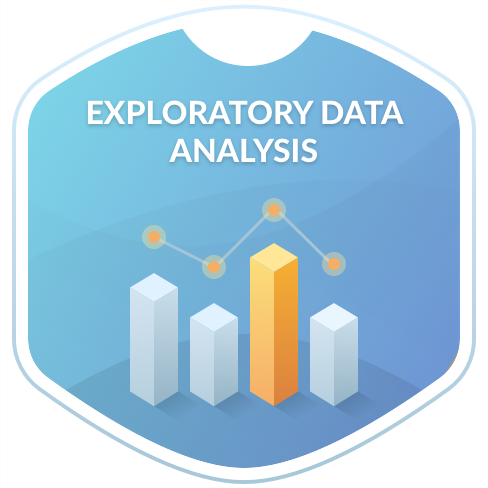

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. 

Lets try to do the EDA with the set of attributes present in the loan dataset that we have prepared. We can try following type of analysis<br>
- Univariate Analysis  - explore individual attribute
- Bivariate Analyis - explore relationship between two attributes

## 4.1 Univariate Analysis

In [35]:
# Set the color coding for the visualizations to be plotted
from matplotlib import cm
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')

#### 4.1.1 Explore Target Variable

Count of each target variable category will give some insights about the samples those are available for the prediction. 

In [41]:
loan_data['Approved'].value_counts()

Y    64
N    50
Name: Approved, dtype: int64

In [42]:
64 / (64 + 50)

0.5614035087719298

Almost 56% of loans are approved!  (= 64 / 64 + 50). Lets visualize it. 

<AxesSubplot:>

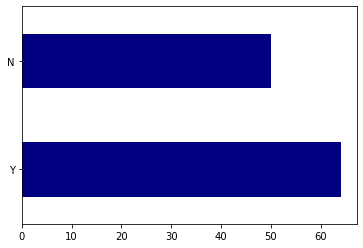

In [43]:
loan_data['Approved'].value_counts().plot.barh(cmap=cmap)

#### 4.1.2 Explore Categorical (Nominal) Independent Variable

Lets try to understand about more about the categorical nominal variables like 'Gender', 'Married', "Self_Employed' and 'Credit_History'.

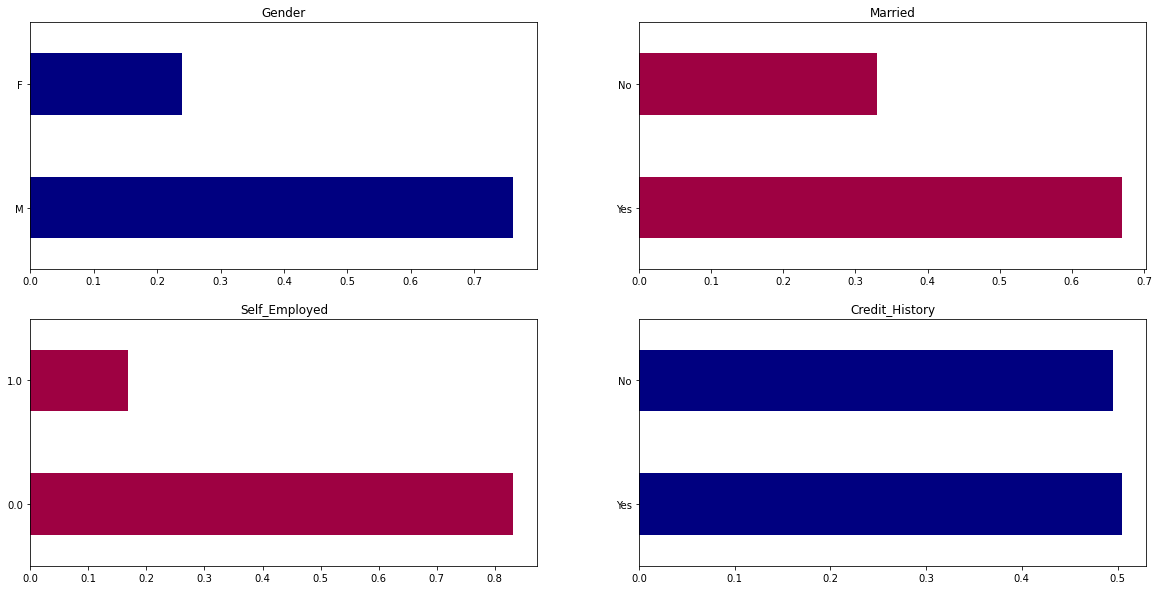

In [44]:
#Prepare a 2 by 2 layout two render these categorical attributes
plt.figure(1) 

plt.subplot(221) 
loan_data['Gender'].value_counts(normalize=True).plot.barh(figsize=(20,10), cmap=cmap, title= 'Gender') 

plt.subplot(222) 
loan_data['Married'].value_counts(normalize=True).plot.barh(title= 'Married', cmap=cmap1) 

plt.subplot(223) 
loan_data['Self_Employed'].value_counts(normalize=True).plot.barh(title= 'Self_Employed', cmap=cmap1) 

plt.subplot(224) 
loan_data['Credit_History'].value_counts(normalize=True).plot.barh(title= 'Credit_History', cmap=cmap) 
plt.show()

The inferences are : 

- 75% applicants are male. 
- 67% of the applicants are married.
- 15% applicants are self employed. 
- Allmost equal number of applicants are there in the regular and defaulter list

#### 4.1.2 Explore Categorical (Ordinal) Independent Variable

Lets try to understand about more about the categorical ordinal variables like 'Dependents', 'Education', and 'Property_Location'.

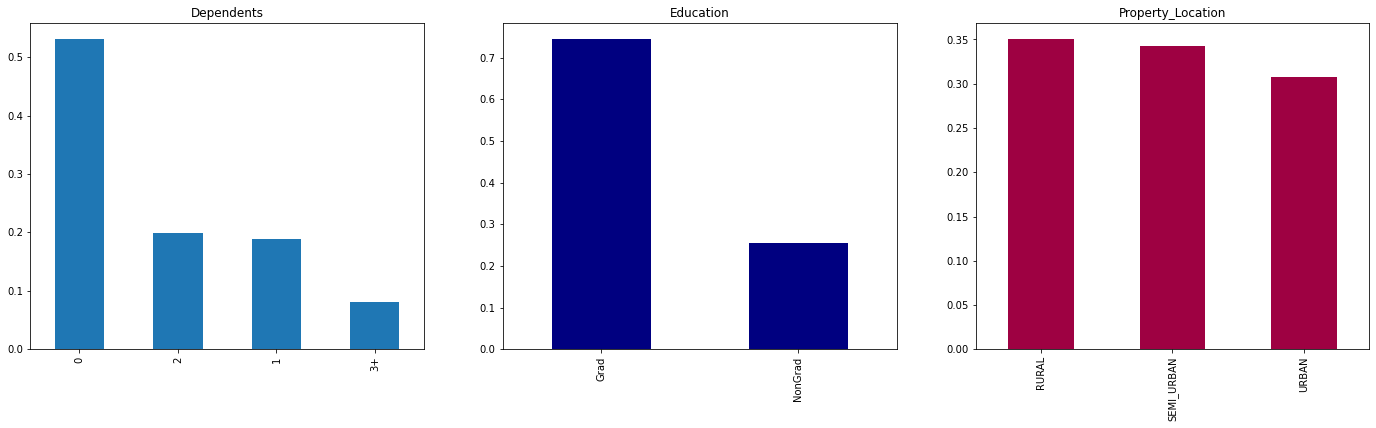

In [40]:
#Prepare a layout two render these categorical attributes
plt.figure(1) 

plt.subplot(131) 
loan_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

plt.subplot(132) 
loan_data['Education'].value_counts(normalize=True).plot.bar(title= 'Education', cmap=cmap) 

plt.subplot(133) 
loan_data['Property_Location'].value_counts(normalize=True).plot.bar(title= 'Property_Location', cmap=cmap1) 
plt.show()

The inferences are :

- Applicants with more than three dependents are very less as compared to the ones who are not having any dependents.
- More educated applicants are demanding the loans
- Almost equal number of samples are drawn from all the localities.

#### 4.1.3 Explore Numerical Independent Variable

Lets try to understand about more about the numeric attribute like 'Applicant_Income', 'CoapplicantIncome' and 'Loan_Amt'.

C:\Users\Poornima92\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


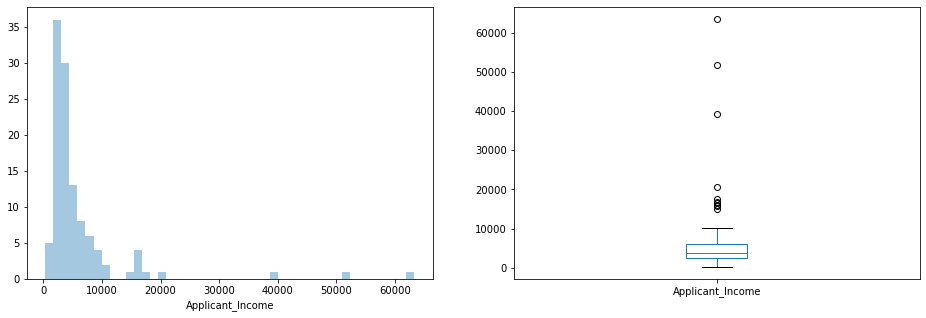

In [41]:
#Prepare a layout to render these numerical attributes
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_data['Applicant_Income'], hist=True, kde=False); 

plt.subplot(122) 
loan_data['Applicant_Income'].plot.box(figsize=(16,5)) 
plt.show()

The inferences are :
- Applicant_Income is more tilted towards the left side of the data distribution. Need to normalize it further.
- Almost all applicants have income less than 10000 but still few applicants are falling in higher income bracket.

Lets see if the education level has some impact on the income or not

Text(0.5, 0.98, '')

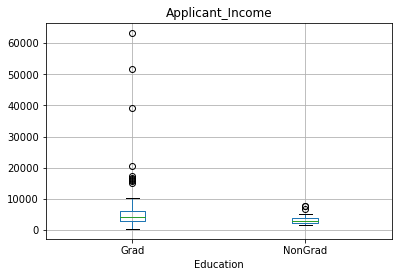

In [42]:
loan_data.boxplot(column='Applicant_Income', by = 'Education', grid=True,) 
plt.suptitle("")

Inference : 
- There are cases of Graduates who tend to earn more income than non-graduates. 
- People in higher income bracket and are graduates are seems to be exceptional cases. 

Let’s look at the Coapplicant income distribution.

C:\Users\Poornima92\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


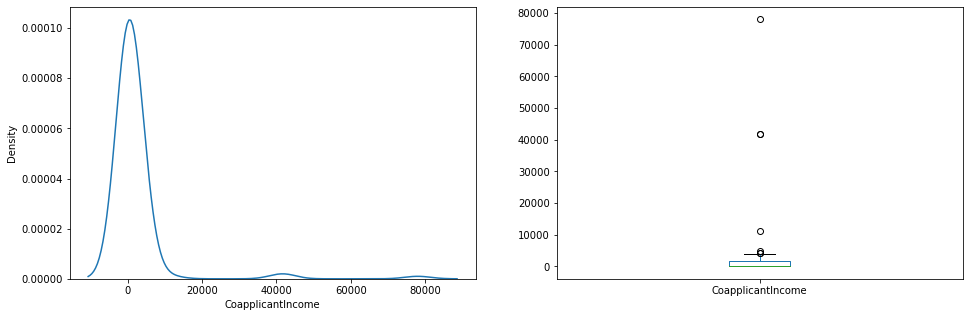

In [43]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(loan_data['CoapplicantIncome'], hist=False, kde=True); 

plt.subplot(122) 
loan_data['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Inference : 
- Almost similar distribution is seen as that of applicant income. 

Let’s look at the distribution of Loan_Amt variable.

C:\Users\Poornima92\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


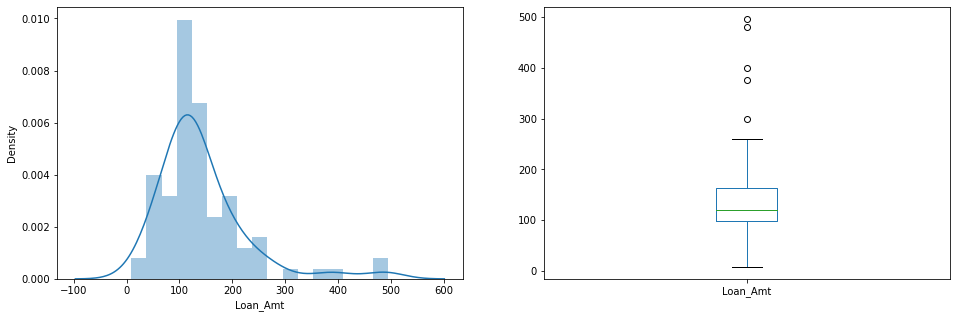

In [44]:
plt.figure(1) 
plt.subplot(121) 
df=loan_data.dropna() 
sns.distplot(df['Loan_Amt']); 

plt.subplot(122) 
df['Loan_Amt'].plot.box(figsize=(16,5)) 
plt.show()

Inference : 
- Loan_Amt distribution is normal. 
- Some outliers are present which need to be handled afterwards.

## 4.2 Bivariate Analysis

We got fair idea about the distribution of the categorical and numerical attributes present in data frame. Lets explore the relationship between these variables and the target.

#### 4.2.1 Compare Categorical Variables with Target

In [45]:
#Set the visuzalization style
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

Lets explore relationship between 'Gender' and approval status.

In [46]:
Gender=pd.crosstab(loan_data['Gender'],loan_data['Approved'])
Gender

Approved,N,Y
Gender,,
F,16,10
M,33,50


<AxesSubplot:ylabel='Gender'>

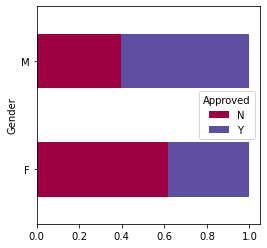

In [47]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(4,4))

Inference : 
- More or less same number of male/feamles are given loans or declined loans.

Now let us visualize the remaining categorical variables vs target variable.

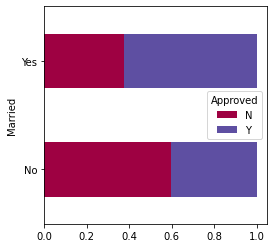

In [48]:
Married=pd.crosstab(loan_data['Married'],loan_data['Approved'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(4,4)) 
plt.show()

- Proportion of married applicants is higher for the approved loans.
- Proportion of unmarried applicants is higher for the rejected loans.


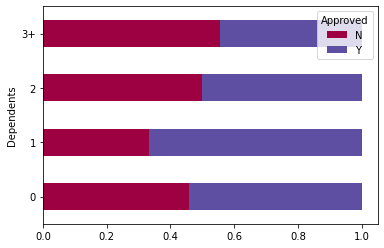

In [49]:
Dependents=pd.crosstab(loan_data['Dependents'],loan_data['Approved']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

- Distribution of applicants with 0, 2 or 3+ dependents is similar across both the categories of Loan_Status.
- Applicants with only single dependents are approved more loans.

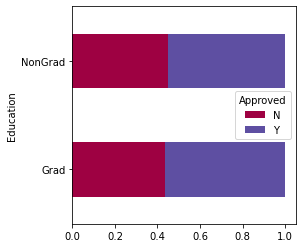

In [50]:
Education=pd.crosstab(loan_data['Education'],loan_data['Approved']) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap,stacked=True, figsize=(4,4)) 
plt.show()

- Almost same trend found in loan approval for grads and non-grads

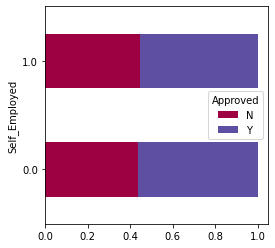

In [51]:
Self_Employed=pd.crosstab(loan_data['Self_Employed'],loan_data['Approved']) 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap,stacked=True, figsize=(4,4)) 
plt.show()

- There is nothing significant we can infer from Self_Employed vs Approved plot.

Now we will look at the relationship between remaining categorical independent variables and loan approval status.

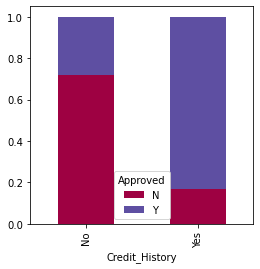

In [52]:
Credit_History=pd.crosstab(loan_data['Credit_History'],loan_data['Approved'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True, figsize=(4,4)) 
plt.show() 

- It seems people without any previous credit history are not approved of the loans. 

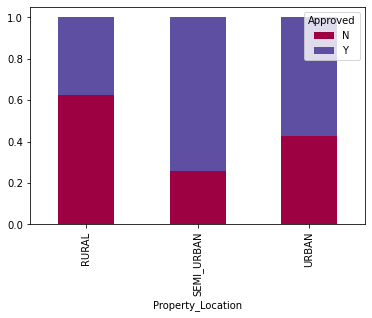

In [53]:
Property_Area=pd.crosstab(loan_data['Property_Location'],loan_data['Approved']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", cmap=cmap, stacked=True) 
plt.show()

- It seems applicants choosing property from Semi urban area are likely to get loans easily.

As discussed in the begining, lets see the variables that we considered as important from the loan approval perspective are really playing the significant role or not. <br>

- Salary: Applicants with high income should easily get loans.
- Credit history: Applicants who have repayed their previous debts should have higher chances of loan approval.
- Loan amount: If the loan amount is less, chances of loan approval should be high.
- Loan tenure: Loan for less time period and less amount should have higher chances of approval.
- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

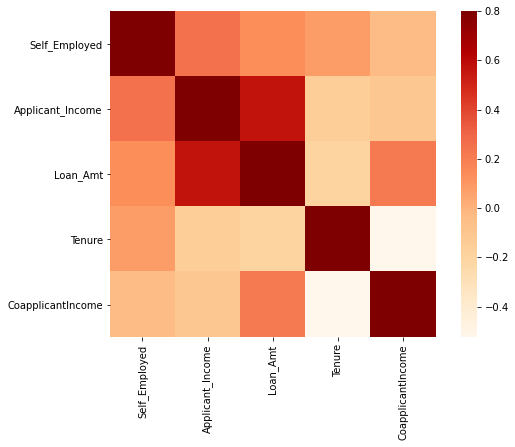

In [54]:
matrix = loan_data.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="OrRd");

- Loan amount and income seems to be highly related. 
- Loan amount and coapplicant income seems to be highly related. 
- Income and employement status (self employed or salaried) are related.

# 5. Feature Engineering
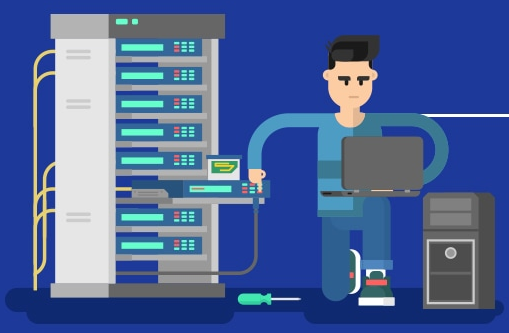

### 5.1 Handling Missing Values

Now lets focus on the treatment that can be given to the missing values as they might impact the model performance.

In [55]:
loan_data.isnull().sum()

Loan_ID              0
Gender               5
Married              2
Self_Employed        7
Education            0
Applicant_Income     0
Dependents           3
Loan_Amt             7
Tenure               2
CoapplicantIncome    0
Credit_History       7
Property_Location    0
Approved             0
dtype: int64

Columns like Gender, Married, Self_Employed, Dependents, Loan_Amt, Tenure and Credit_History have missing values. 

Methods to fill the missing values:
- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode 

For categorical columns like Gender, Married, Dependents, Credit_History and Self_Employed,very less missing valuesare present  so lets fill them using the mode of the features.  

In [56]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True) 
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True) 
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True) 
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True) 
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

Lets explore missing values in Tenure. 

In [57]:
loan_data['Tenure'].value_counts()

360.0    96
180.0     8
300.0     3
480.0     2
240.0     2
120.0     1
Name: Tenure, dtype: int64

The most frequent value is 360. So lets replace the missing values in this variable using the mode of this variable.

In [58]:
loan_data['Tenure'].fillna(loan_data['Tenure'].mode()[0], inplace=True)

For numeric variable like Loan_Amt, lets use mean or median to impute the missing values. As loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [59]:
loan_data['Loan_Amt'].fillna(loan_data['Loan_Amt'].median(), inplace=True)

Recheck the status of missing values.

In [60]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Self_Employed        0
Education            0
Applicant_Income     0
Dependents           0
Loan_Amt             0
Tenure               0
CoapplicantIncome    0
Credit_History       0
Property_Location    0
Approved             0
dtype: int64

No missing values for any of the columns!

### 5.2 Handling Outliers

In univariate analysis, we observed that income, loan amount has outliers present in it. So lets treat them as they affect the distribution of data.

One way to remove the skewness is by doing the log transformation. With log transformation, it does not affect the smaller values much, but reduces the larger values, so it gives a distribution similar to normal distribution.

Lets look at spread of Applicant_Income. 

<AxesSubplot:>

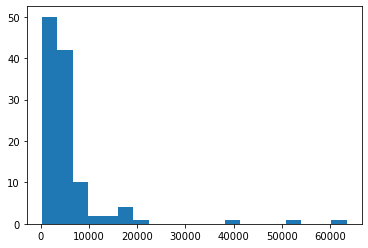

In [61]:
loan_data['Applicant_Income'].hist(bins=20, grid=False)

It seems to be bit right skewed so lets scale. 

<AxesSubplot:>

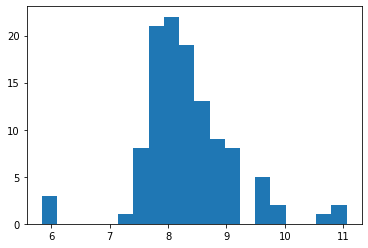

In [62]:
loan_data['Applicant_Income_log'] = np.log(loan_data['Applicant_Income']) 
loan_data['Applicant_Income_log'].hist(bins=20, grid=False)

Lets look at spread of Loan_Amt. 

<AxesSubplot:>

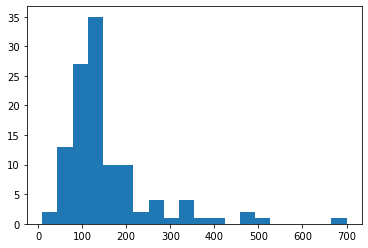

In [63]:
loan_data['Loan_Amt'].hist(bins=20, grid=False)

It seems to be bit left skewed so lets scale. 

<AxesSubplot:>

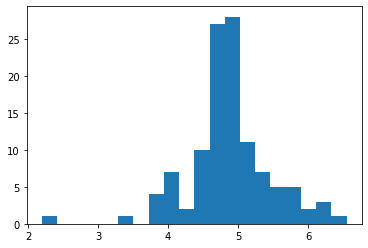

In [64]:
loan_data['Loan_Amt_log'] = np.log(loan_data['Loan_Amt']) 
loan_data['Loan_Amt_log'].hist(bins=20, grid=False)

Now the effect of the outliers is reduced a lot, so have crossed one more required step towards model building exercise.

### 5.3 Datatype conversion

Lets look at the data type of all the attributes before proceding further. 

In [65]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               114 non-null    object 
 1   Gender                114 non-null    object 
 2   Married               114 non-null    object 
 3   Self_Employed         114 non-null    float64
 4   Education             114 non-null    object 
 5   Applicant_Income      114 non-null    int64  
 6   Dependents            114 non-null    object 
 7   Loan_Amt              114 non-null    float64
 8   Tenure                114 non-null    float64
 9   CoapplicantIncome     114 non-null    int64  
 10  Credit_History        114 non-null    object 
 11  Property_Location     114 non-null    object 
 12  Approved              114 non-null    object 
 13  Applicant_Income_log  114 non-null    float64
 14  Loan_Amt_log          114 non-null    float64
dtypes: float64(5), int64(2),

Seems the categorical attributes are still shown as the objects, needs to convert them to categories. 

In [66]:
loan_data = loan_data.astype({"Gender":'category', "Married":'category',  "Education":'category', "Dependents":'category', "Credit_History":'category', "Property_Location":'category', "Approved":'category'}) 

In [67]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Loan_ID               114 non-null    object  
 1   Gender                114 non-null    category
 2   Married               114 non-null    category
 3   Self_Employed         114 non-null    float64 
 4   Education             114 non-null    category
 5   Applicant_Income      114 non-null    int64   
 6   Dependents            114 non-null    category
 7   Loan_Amt              114 non-null    float64 
 8   Tenure                114 non-null    float64 
 9   CoapplicantIncome     114 non-null    int64   
 10  Credit_History        114 non-null    category
 11  Property_Location     114 non-null    category
 12  Approved              114 non-null    category
 13  Applicant_Income_log  114 non-null    float64 
 14  Loan_Amt_log          114 non-null    float64 
dtypes: cate

### 5.3 Feature Creation

Looking at the dataset structure now, we can think of merging of the few exisitng features, deriving the new features. Lets perform these feature creations.

Total Income - Combine the Applicant Income and Coapplicant Income. Logic is if the total income is high, chances of loan default are less , hence approval chances might also be high.

In [68]:
loan_data['Total_Income']=loan_data['Applicant_Income'] + loan_data['CoapplicantIncome'] 

C:\Users\Poornima92\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


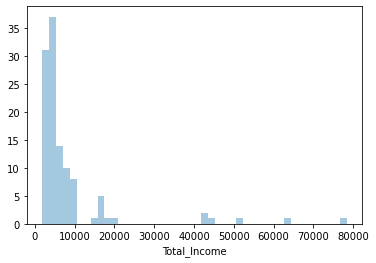

In [69]:
# Let’s check the distribution of Total Income.
sns.distplot(loan_data['Total_Income'], kde=False);

The distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

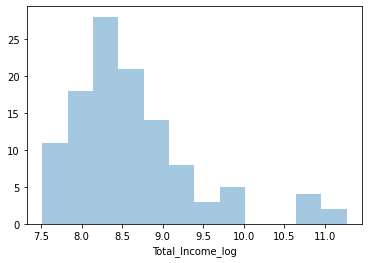

In [70]:
loan_data['Total_Income_log'] = np.log(loan_data['Total_Income']) 
sns.distplot(loan_data['Total_Income_log'], kde=False); 

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

EMI - Monthly Equated Installment amount to be paid by the applicant to repay the loan. Logic is people who have high EMI’s might find it difficult to pay back the loan.Derive the EMI by taking the ratio of loan amount with respect to loan tenure.

In [71]:
loan_data['EMI'] = loan_data['Loan_Amt']/loan_data['Tenure'] 

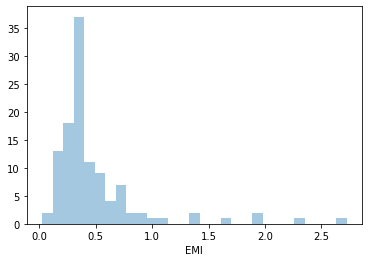

In [72]:
# Let’s check the distribution of EMI variable.
sns.distplot(loan_data['EMI'], kde=False);

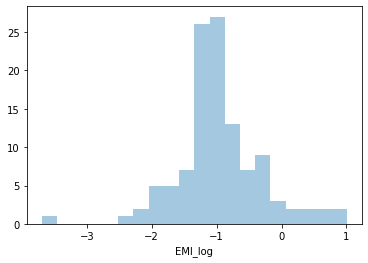

In [73]:
loan_data['EMI_log'] = np.log(loan_data['EMI']) 
sns.distplot(loan_data['EMI_log'], kde=False);

Balance Income - Income left after the EMI has been paid from total income. Logic is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

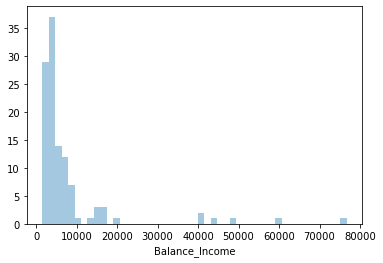

In [74]:
loan_data['Balance_Income'] = loan_data['Total_Income'] - (loan_data['EMI']*1000) 
# Multiply with 1000 to make the units equal 
sns.distplot(loan_data['Balance_Income'], kde=False);

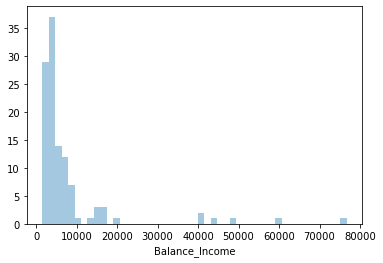

In [75]:
loan_data['Balance_Income_Log'] = np.log(loan_data['Balance_Income']) 
sns.distplot(loan_data['Balance_Income'], kde=False);

Now the original variables from which the derived attributes are generated , those can be easily dropped. 

In [76]:
loan_data = loan_data.drop(['Applicant_Income', 'CoapplicantIncome', 'Loan_Amt', 'Tenure', 'Total_Income', 'EMI', 'Balance_Income'], axis=1) 

Loan_ID is unique number attached to each loan application, its not doing much value addition as much, so lets remove it as well. 

In [77]:
loan_data = loan_data.drop(['Loan_ID'], axis=1) 

In [78]:
loan_data.columns

Index(['Gender', 'Married', 'Self_Employed', 'Education', 'Dependents',
       'Credit_History', 'Property_Location', 'Approved',
       'Applicant_Income_log', 'Loan_Amt_log', 'Total_Income_log', 'EMI_log',
       'Balance_Income_Log'],
      dtype='object')

Lets use this prepared dataset for the model building now!

## 6. Model Building
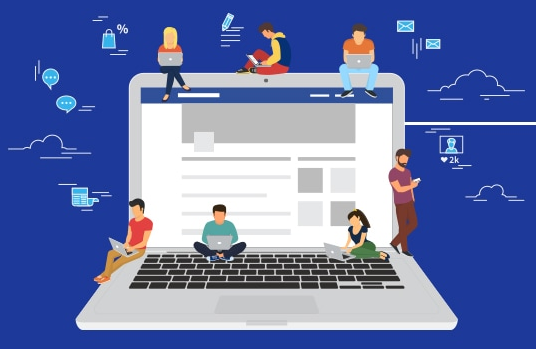


As discussed earlier, this is binary classification, so lets explore two of the choices those are very widely used for the model preparation for binary classification.

- Logistic Regression <br> 
In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc... Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.<br>
- Decision Tree <br>
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences. It is one way to display an algorithm that only contains conditional control statements. It is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

### 6.1 Some more transformations

We also need to separate the independent and target variables separately as the scikit implemenations require us to provide data in specific format only. 

In [79]:
#X is set of independant variables
X = loan_data.drop('Approved',1) 

#y is target variable
y = loan_data.Approved

In [80]:
X.columns

Index(['Gender', 'Married', 'Self_Employed', 'Education', 'Dependents',
       'Credit_History', 'Property_Location', 'Applicant_Income_log',
       'Loan_Amt_log', 'Total_Income_log', 'EMI_log', 'Balance_Income_Log'],
      dtype='object')

The dataframe has dummy variables, but those also needs to be converted into dummies.

In [81]:
X = pd.get_dummies(X) 
loan_data = pd.get_dummies(loan_data)

In [82]:
X.columns

Index(['Self_Employed', 'Applicant_Income_log', 'Loan_Amt_log',
       'Total_Income_log', 'EMI_log', 'Balance_Income_Log', 'Gender_F',
       'Gender_M', 'Married_No', 'Married_Yes', 'Education_Grad',
       'Education_NonGrad', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Credit_History_No', 'Credit_History_Yes',
       'Property_Location_RURAL', 'Property_Location_SEMI_URBAN',
       'Property_Location_URBAN'],
      dtype='object')

Need to train the model on training samples and make predictions using the testing samples.
For that purpose, need to use the train_test_split function from sklearn to divide our dataset.

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

### 6.2 Model Building with Logistic Regression
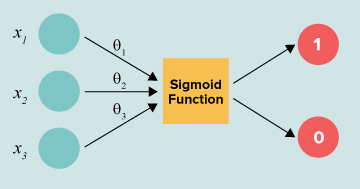

Lets try first model for binary classification with Logistic Regression.

In [84]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [85]:
model_LR = LogisticRegression(random_state=100) 
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [86]:
model_LR.classes_

array(['N', 'Y'], dtype=object)

In [87]:
model_LR.coef_

array([[-0.14263324,  0.65670908, -0.79278302,  0.04533376, -0.17559931,
        -0.01897319, -0.14225914,  0.14204843, -0.51537698,  0.51516627,
        -0.00841411,  0.0082034 ,  0.12918592,  0.38941561, -0.35740304,
        -0.1614092 , -1.41778987,  1.41757917,  0.4631004 , -0.01366854,
        -0.44964256]])

In [88]:
model_LR.intercept_

array([-2.04216828])

Let’s predict the loan status for testing set.

In [89]:
predicted = model_LR.predict(X_test)

In [90]:
actual = y_test

Lets determine the accuracy of this model.

In [91]:
accuracy_score(actual,predicted)

0.6857142857142857

Predictions are almost 77% accurate, i.e. we have identified 77% of the loan approvals correctly.

Let us find the feature importance now, i.e. which features are most important for this problem.

In [92]:
X_test.columns

Index(['Self_Employed', 'Applicant_Income_log', 'Loan_Amt_log',
       'Total_Income_log', 'EMI_log', 'Balance_Income_Log', 'Gender_F',
       'Gender_M', 'Married_No', 'Married_Yes', 'Education_Grad',
       'Education_NonGrad', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Credit_History_No', 'Credit_History_Yes',
       'Property_Location_RURAL', 'Property_Location_SEMI_URBAN',
       'Property_Location_URBAN'],
      dtype='object')

In [93]:
model_LR.coef_

array([[-0.14263324,  0.65670908, -0.79278302,  0.04533376, -0.17559931,
        -0.01897319, -0.14225914,  0.14204843, -0.51537698,  0.51516627,
        -0.00841411,  0.0082034 ,  0.12918592,  0.38941561, -0.35740304,
        -0.1614092 , -1.41778987,  1.41757917,  0.4631004 , -0.01366854,
        -0.44964256]])

<b>Credit_History is the most important feature followed by Applicant_Income.<b>

###  6.2 Model Building with kFoldStratification

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

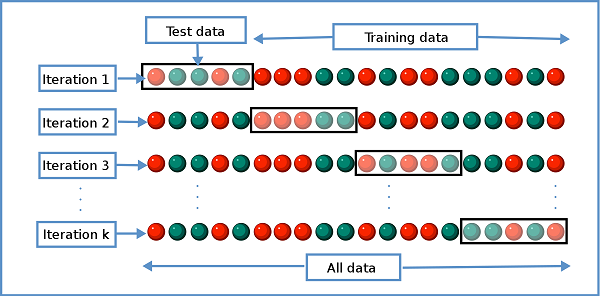

The general procedure is as follows:

1) Shuffle the dataset randomly. <br>
2) Split the dataset into k groups <br>
3) For each unique group:<br>
    - (a) Take the group as a hold out or test data set<br>
    - (b) Take the remaining groups as a training data set<br>
    - (c) Fit a model on the training set and evaluate it on the test set<br>
    - (d) Retain the evaluation score and discard the model<br>
4) Summarize the skill of the model using the sample of model evaluation scores<br>

Lets try it out programatically now!

In [94]:
from sklearn.model_selection import StratifiedKFold

In [95]:
X1 = X.to_numpy()
y1 = y.to_numpy()

In [96]:
number_of_splits = 5 
iteration = 1 
sum_of_accuracies = 0 
skf = StratifiedKFold(n_splits=number_of_splits, shuffle=True, random_state=100)
for train_index, test_index in skf.split(X1, y1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    model = LogisticRegression(random_state=1)    
    model.fit(X_train, y_train) 
    pred_test = model.predict(X_test)     
    score = accuracy_score(y_test,pred_test) 
    sum_of_accuracies = sum_of_accuracies + score
    print(' Iteration : ', iteration, '    Accuracy score : ',score)     
    iteration = iteration + 1
   
print('\nAverage Accuracy : ', sum_of_accuracies / number_of_splits)     

 Iteration :  1     Accuracy score :  0.7391304347826086
 Iteration :  2     Accuracy score :  0.6086956521739131
 Iteration :  3     Accuracy score :  0.7391304347826086
 Iteration :  4     Accuracy score :  0.6956521739130435
 Iteration :  5     Accuracy score :  0.8636363636363636

Average Accuracy :  0.7292490118577075


<b>Average accuracy that we are obtaining after 5 fold validation is around 75%.<b>

###  6.3 Model Building with Decision Tree
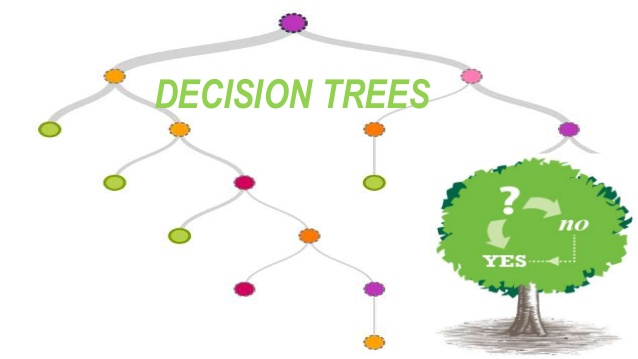

Lets try second model for binary classification with decision trees.

As we are going to plot some visualizations using this decision tree classifier, some additional plotting packages also needs to be installed.

In [97]:
# do it only first time
!pip install pydot 

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train, y_train)

Lets plot the decition tree.

In [ ]:
loan_data.columns

In [ ]:
feature_names = loan_data.columns[0: loan_data.columns.size - 2]
feature_names

In [ ]:
target_names = loan_data.columns[loan_data.columns.size - 2:]
target_names

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=feature_names, class_names=target_names,
                filled=True, rounded=True,
                special_characters=True)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Lets made the decision tree available to the outside world!

In [ ]:
# Create PDF
graph.write_pdf("loans.pdf")

# Create PNG
graph.write_png("loans.png")

Try out the predictions on the test data.

In [ ]:
y_pred = dt.predict(X_test)

Lets create a confusion matrix for the decision tree. 
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.

Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

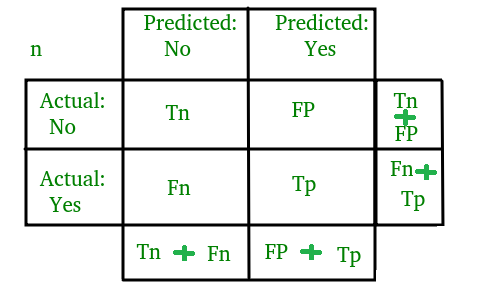

In [ ]:
actuals = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(actuals, predictions)

Lets compute the accuracy of this model.

In [ ]:
#accuracy = (( TP + TN ) / ( TP + TN + FP + FN)) * 100
accuracy = (( 7  + 9 ) / ( 7 + 9 + 3 + 3)) * 100
accuracy 

So we are able to identify the 73% of loan approval cases correctly!

Lets try to identify which features played important role in the model building.

In [ ]:
importances=pd.Series(dt.feature_importances_, index=X.columns).sort_values()
importances.plot(kind='barh', figsize=(12,8), cmap=cmap)

Again Credit_History and Applicant_Income are coming out as clear cut indicator for the loan approval prediction!

# 7. Model Selection 
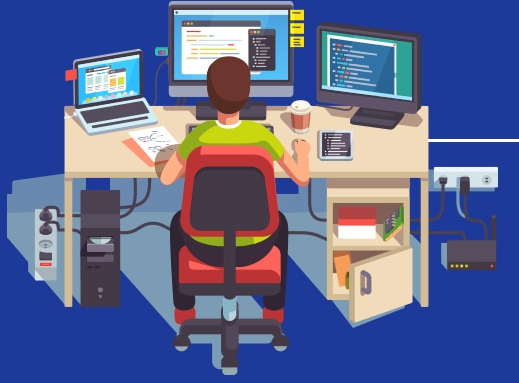

Accuracy of Logistic regression model is 77% <br>
Average Accuracy of Stratified Logistic regression model is 75% <br>
Accuracy of Decision tree model is 73% 

Though accuracy of Logistic Regression model is more than kFoldStratified Logistic regression model, kFoldStratified Logistic regression model will give better results on unseen records as its tried on more distinct set of train/test samples rather than only one set of train/test samples.<br>
<b>As a result we can select kFoldStratified logistic regression model for the loan prediction automation!<b>